# Maximização de vendas com ML

## Problema:

A empresa quer lançar um novo produto. Assim, ela fez um projeto piloto com 
2240 clientes aleatórios, para estudar as características dos clientes que estão dispostos a comprar o novo produto.

## Objetivo:

Construir um modelo preditivo que irá maximizar os lucros da venda desse produto. O modelo permitirá que a empresa escolha os clientes com maior probabilidade decomprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamenterentável.


## Metadados: Separei os metadados em 3 categoriais, apenas por didática.

#### Características Sociodemográficas:

* Education: Nível de educação;
* Marital: Estado Civíl;
* Kidhome: número de crianças pequenas na casa do cliente;
* Teenhome: número de adolescentes na casa do cliente;
* Year_Birth
* Income: renda familiar anual do cliente;

#### Relações com a plataforma:

* Complain(reclamação): 1, se o cliente reclamou no último 2 anos;
* DtCustomer: data de inscrição do cliente na empresa;
* MntFishProducts: valor gasto em produtos pesqueiros nos últimos 2 anos;
* MntMeatProducts: valor gasto em produtos em carne nos últimos 2 anos;
* MntFruits: valor gasto em frutas nos últimos 2 anos;
* MutSweetProducts: valor gasto em doces nos últimos 2 anos;
* MntWines: valor gasto em vinhos nos últimos 2 anos;
* MntGoldProds: amount spent on gold products in the last 2 years;
* NumDealsPurchases: número de compras feitas com desconto;
* NumCatalogPurchases: número de compras feitas usando o catálogo;
* NumStorePurchases: número de compras feitas diretamente nas lojas;
* NumWebPurchases: número de compras feitas através do site da empresa;
* NumWebVisitsMonth: número de visitas ao site da empresa no último mês;
* Recency: número de dias desde a última compra;

#### Relações com as campanhas:

* AccepetedCmp1: 1, se o cliente aceitou a primeira campanha. Senão, 0;
* AccepetedCmp2: 1, se o cliente aceitou a segunda campanha. Senão, 0;
* AccepetedCmp3: 1, se o cliente aceitou a terceira campanha. Senão, 0;
* AccepetedCmp4: 1, se o cliente aceitou a quarta campanha. Senão, 0;
* AccepetedCmp5: 1, se o cliente aceitou a quinta campanha. Senão, 0;
* Response(Target): 1, se o cliente aceitou a oferta na última campanha. Senão, 0;

#### Sumário:
* <a href='#exploracao'>Exploração Inicial dos Dados</a>
* <a href='#inicial'>Insights Iniciais</a>
* <a href='#tratamento'>Preparação dos Dados</a>
* <a href='#construcao'>Construção do modelo</a>
* <a href='#conclusao'>Conclusão</a>

---

#### Exportação das bibliotecas necessárias:

In [1]:
#Bibliotecas necessárias para manipular os dados
import pandas as pd
import numpy as np
import statistics as sts

#Bibliotecas necessárias para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#Bibliotecas para trabalhar com datas
from datetime import date
from datetime import datetime

#Bibliotecas necessárias para manipular os dados
import warnings
warnings.filterwarnings("ignore")

#Bibliotecas necessárias para balancear as classes
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

#Bibliotecas necessárias para usar os algoritmos de ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Bibliotecas necessárias para validar o modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

---

## <p id='exploracao'>Exploração Inicial dos Dados<p>

Nessa etapa, vamos visualizar o nosso dataset. Ter o entendimento inicial dos tipos de dados que temos. Além disso, vê se há valores faltantes e algumas medidas estatísticas de como os dados estão se comportando.

In [2]:
df = pd.read_csv('data/ml_project1_data.csv')
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Trabalhar com a idade é melhor em anos, pois são números mais explicativos e de escalar menor.
data_atual = date.today()
ano_atual = int(str(data_atual).split('-')[0])
df[:]['Year_Birth'] = ano_atual - df[:]['Year_Birth']

In [5]:
#Transformando as datas de registro para meses, pois é uma escala melhor de se trabalhar
data_atual = date.today()
d1 = data_atual.strftime('%Y-%m-%d')
d1 = datetime.strptime(d1, '%Y-%m-%d')
dt_customer = []
for i in range(0, len(df['Dt_Customer'])):
    d2 = datetime.strptime(df['Dt_Customer'][i], "%Y-%m-%d")
    quantidade_meses = abs((d1 - d2).days)/30
    dt_customer.append(float(round(quantidade_meses, 2)))

df['dt_customer'] = dt_customer

In [6]:
#Tratar variáveis categóricas

def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

'''
Temos 5 categorias de edução. Transformei em variáveis discreta. Cada categoria relacionada um código.
'''

df["Education_Coded"] = coding(df["Education"], {'PhD':5, 'Master': 4, 'Master':3, 'Basic': 2, '2n Cycle': 1})

'''
Temos 7 categorias de estado civíl. Transformei em variáveis discreta. Cada categoria relacionada um código. Contudo, 
usuários que tinha estado civíl alone, absurd e YOLO classifiquei como solteiros.
'''

df["Marital_Status_Coded"] = coding(df["Marital_Status"], {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 1, 'Absurd': 1, 'YOLO': 1})






In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_customer,Education_Coded,Marital_Status_Coded
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,93.886076,3.393750,2.478571
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,6.737386,1.124797,1.047972
min,0.000000,25.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,82.100000,1.000000,1.000000
25%,2828.250000,44.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,88.122500,3.000000,2.000000
50%,5458.500000,51.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,93.950000,3.000000,3.000000
75%,8427.750000,62.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,99.730000,4.000000,3.000000
max,11191.000000,128.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,105.400000,5.000000,5.000000


---

## <p id='inicial'>Insights Iniciais</p>

Nessa sessão, vamos ver o comportamento dos nossos atributos graficamente, fazendo a análise incondicional univarida, univariada condicionada à classe e multivariada. Desse modo,  tentaremos, por meio da análise exploratória, identificar algum preditor, outliers, ruídos etc. E, fazer comentários do que foi produzido.

#### Características Sociodemográficas

<AxesSubplot:xlabel='Marital_Status_Coded', ylabel='Count'>

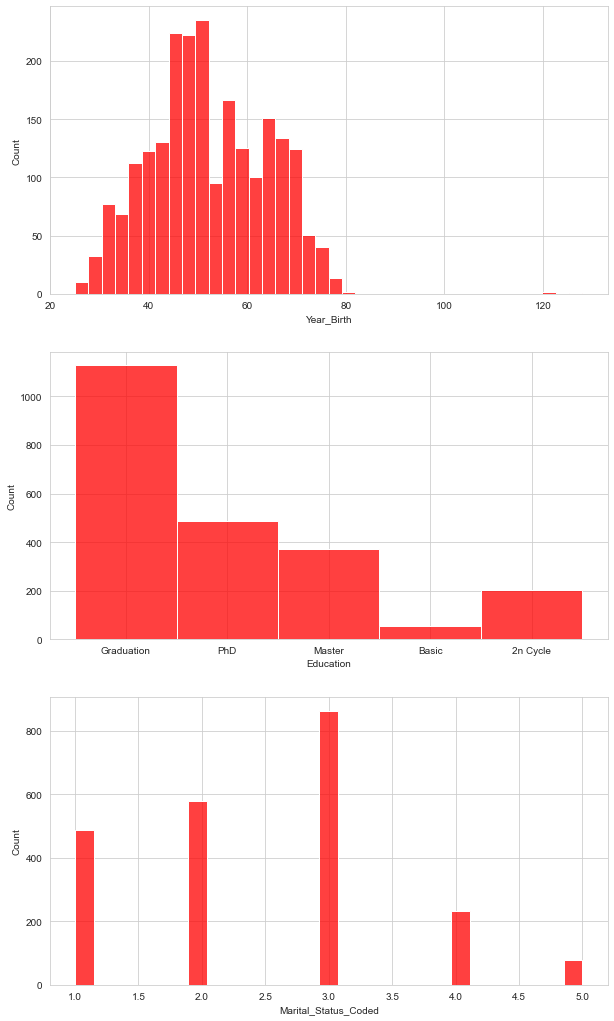

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

#Nas idades, já conseguimos identificar alguns outliers, haja visto que tem usuários com mais de 120 anos.
sns.histplot(ax=axes[0], x='Year_Birth', data=df,color='r')

sns.histplot(ax=axes[1], x='Education', data=df,color='r')

sns.histplot(ax=axes[2], x='Marital_Status_Coded', data=df,color='r')

<AxesSubplot:xlabel='Income', ylabel='Count'>

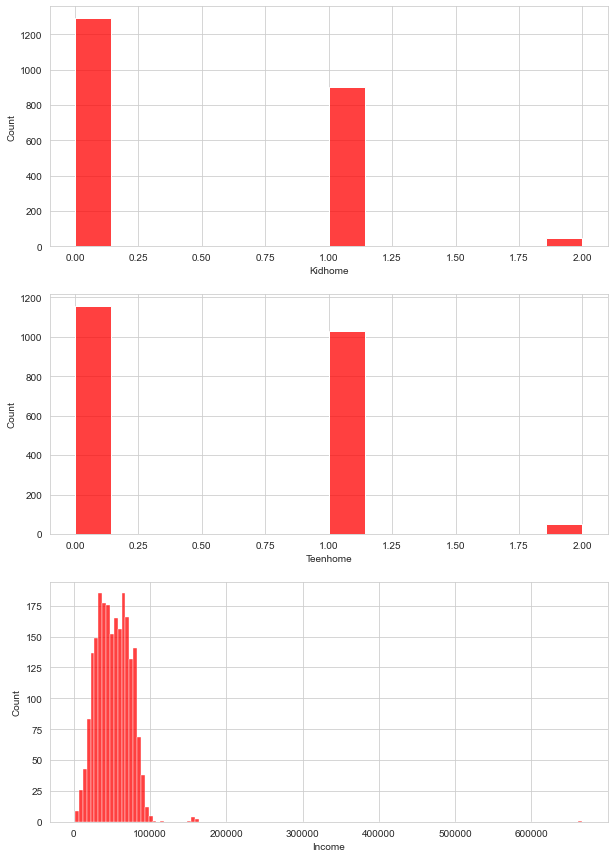

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(ax=axes[0], x='Kidhome', data=df,color='r')
sns.histplot(ax=axes[1], x='Teenhome', data=df,color='r')
sns.histplot(ax=axes[2], x='Income', data=df,color='r')

---

#### Relações com a plataforma:

In [10]:
relacoes_plataforma = ['Complain', 'Dt_Customer', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts','MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth','Recency']

<AxesSubplot:xlabel='Recency', ylabel='Count'>

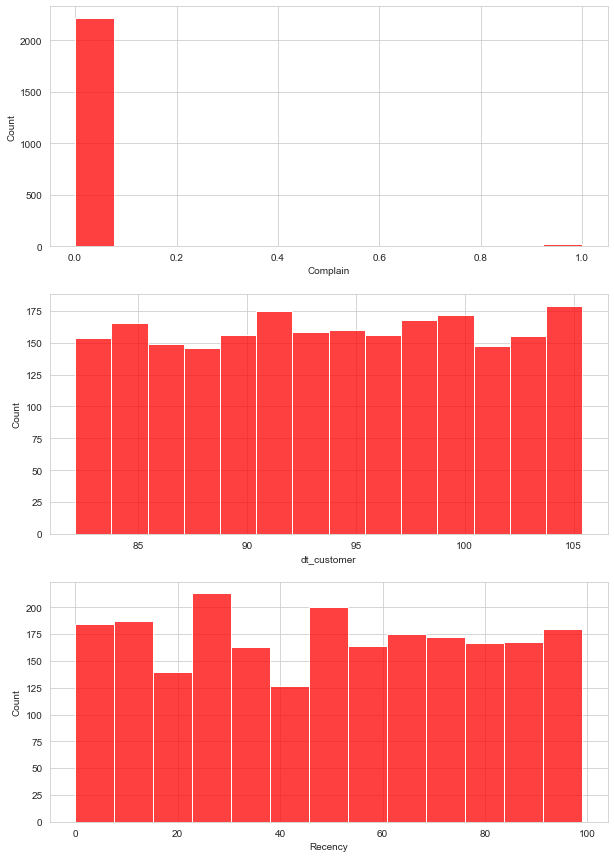

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

#Tem 21 usuários que reclaram nos últimos 2 anos, pode ser algo relevante ou outlier
sns.histplot(ax=axes[0], x='Complain', data=df, color='r')

sns.histplot(ax=axes[1], x='dt_customer', data=df, color='r')

sns.histplot(ax=axes[2], x='Recency', data=df, color='r')

<AxesSubplot:xlabel='MntFruits', ylabel='Count'>

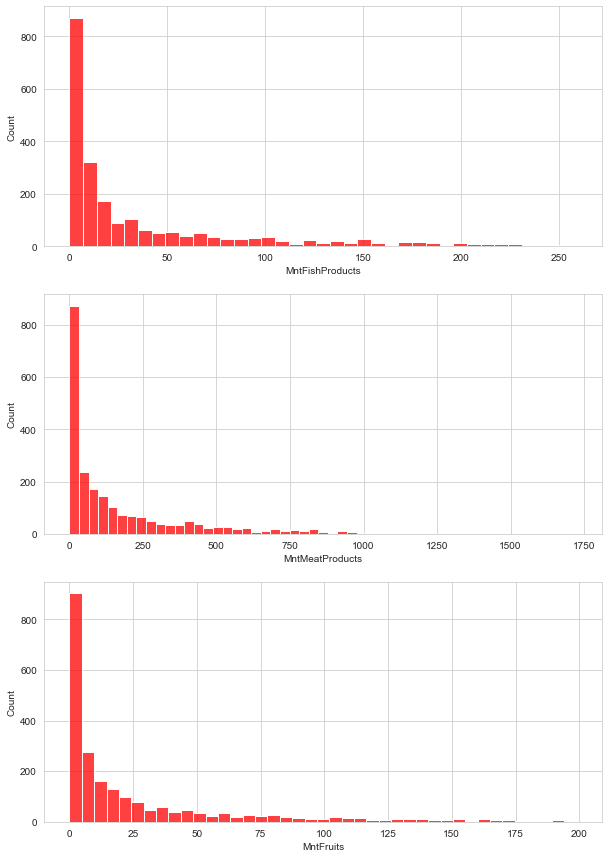

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='MntFishProducts', data=df,color='r')
#Possível presença de outlier
sns.histplot(ax=axes[1], x='MntMeatProducts', data=df, color='r')

sns.histplot(ax=axes[2], x='MntFruits', data=df, color='r')

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

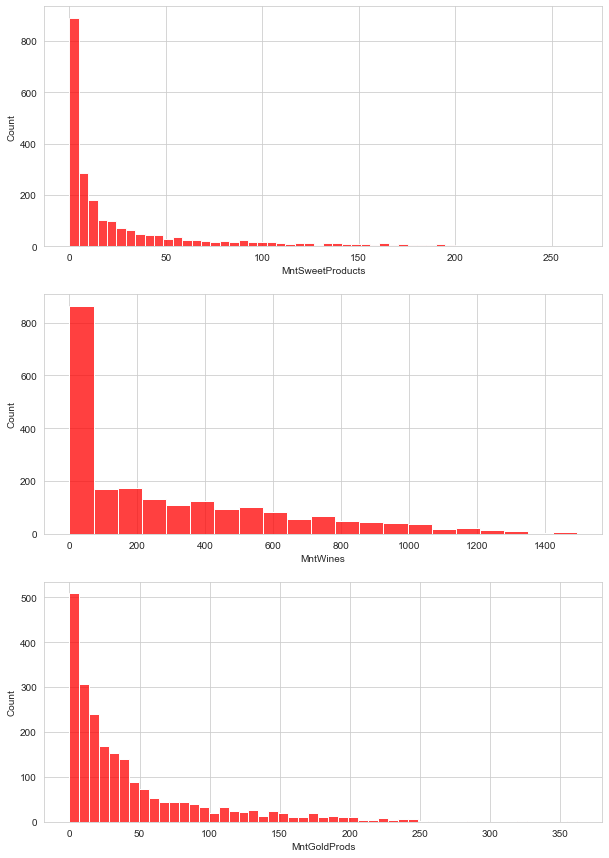

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

#Possível presença de outlier
sns.histplot(ax=axes[0], x='MntSweetProducts', data=df, color='r')

sns.histplot(ax=axes[1], x='MntWines', data=df, color='r')
#Possível presença de outlier
sns.histplot(ax=axes[2], x='MntGoldProds', data=df, color='r')

<AxesSubplot:xlabel='NumStorePurchases', ylabel='Count'>

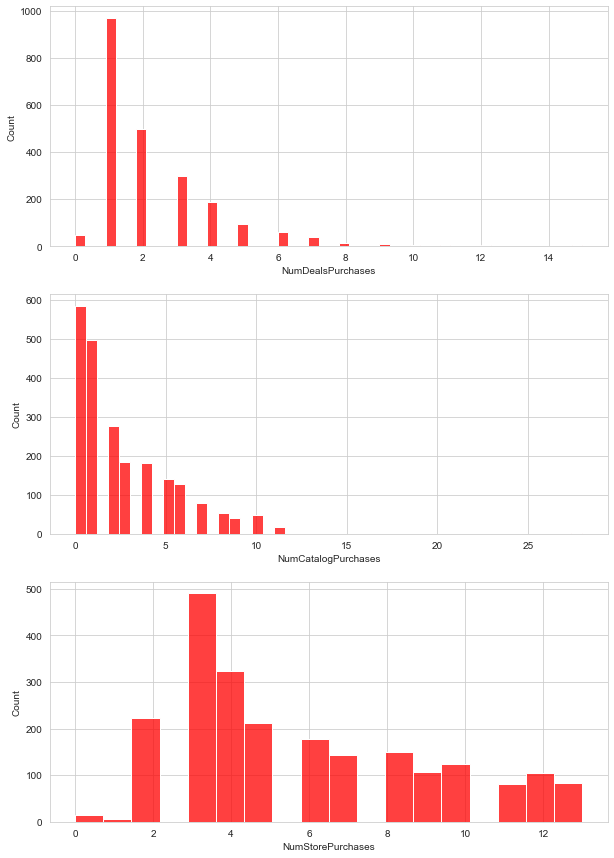

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='NumDealsPurchases', data=df, color='r')
#Possível presença de outlier
sns.histplot(ax=axes[1], x='NumCatalogPurchases', data=df, color='r')

sns.histplot(ax=axes[2], x='NumStorePurchases', data=df, color='r')

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

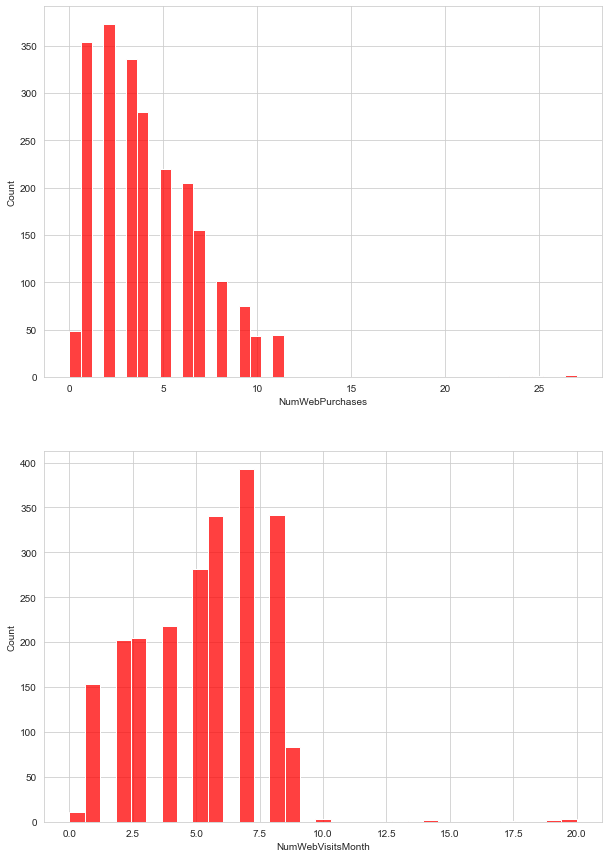

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Tem possível ponto de outlier, haja visto que tem pouquíssimos usuários com mais de 11 compras
sns.histplot(ax=axes[0], x='NumWebPurchases', data=df,color='r')

sns.histplot(ax=axes[1], x='NumWebVisitsMonth', data=df,color='r')

---

#### Relações com as campanhas:

In [16]:
relacoes_campanhas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
target = ['Response']

<AxesSubplot:xlabel='AcceptedCmp3', ylabel='Count'>

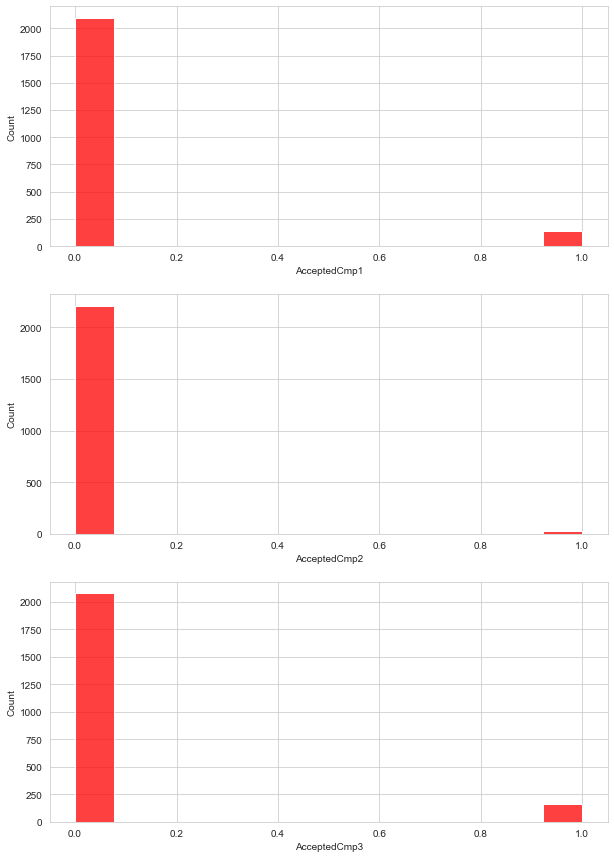

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='AcceptedCmp1', data=df,color='r')

sns.histplot(ax=axes[1], x='AcceptedCmp2', data=df,color='r')

sns.histplot(ax=axes[2], x='AcceptedCmp3', data=df,color='r')

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='Count'>

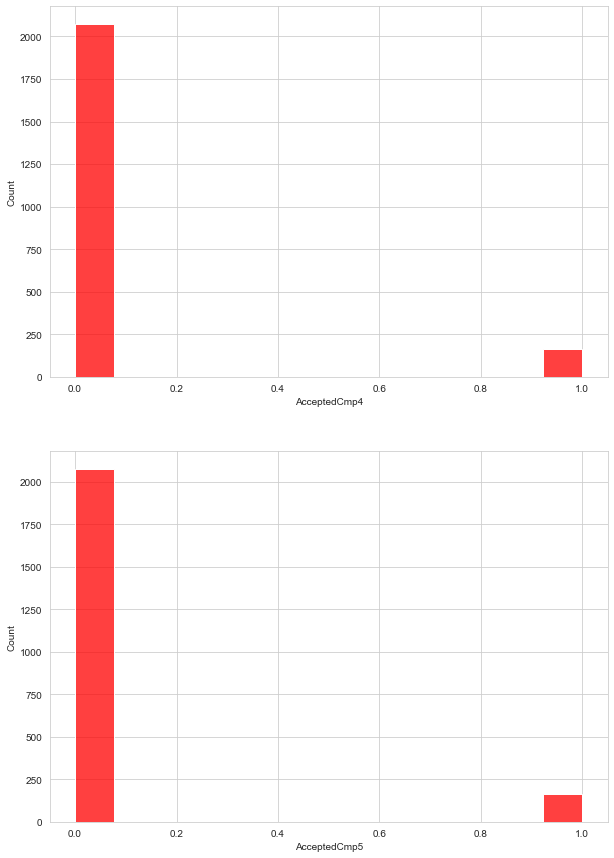

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='AcceptedCmp4', data=df,color='r')

sns.histplot(ax=axes[1], x='AcceptedCmp5', data=df,color='r')

#### Análise univariada condicionada ao target - Características Sociodemográficas:

<AxesSubplot:xlabel='Marital_Status_Coded', ylabel='Count'>

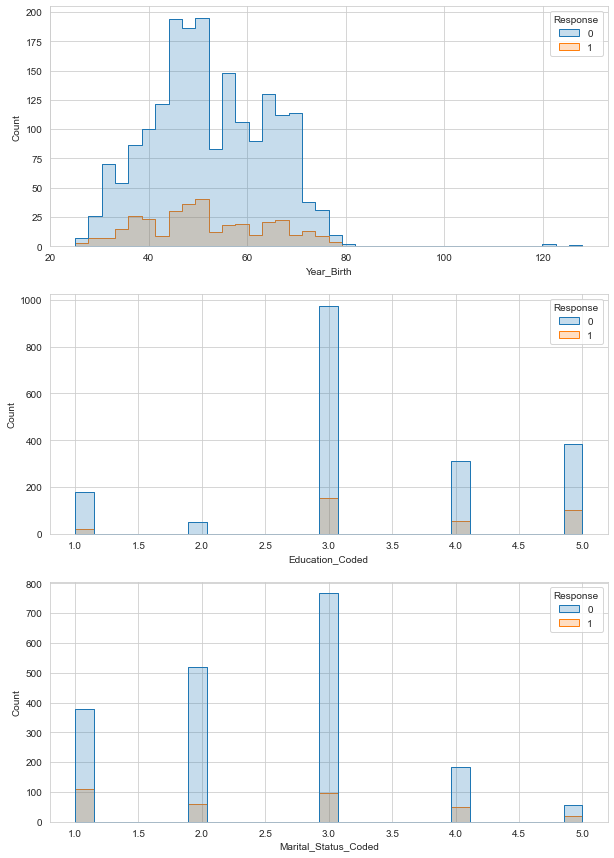

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(ax=axes[0], x='Year_Birth', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='Education_Coded', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='Marital_Status_Coded', hue=target[0], element="step", data=df)

<AxesSubplot:xlabel='Income', ylabel='Count'>

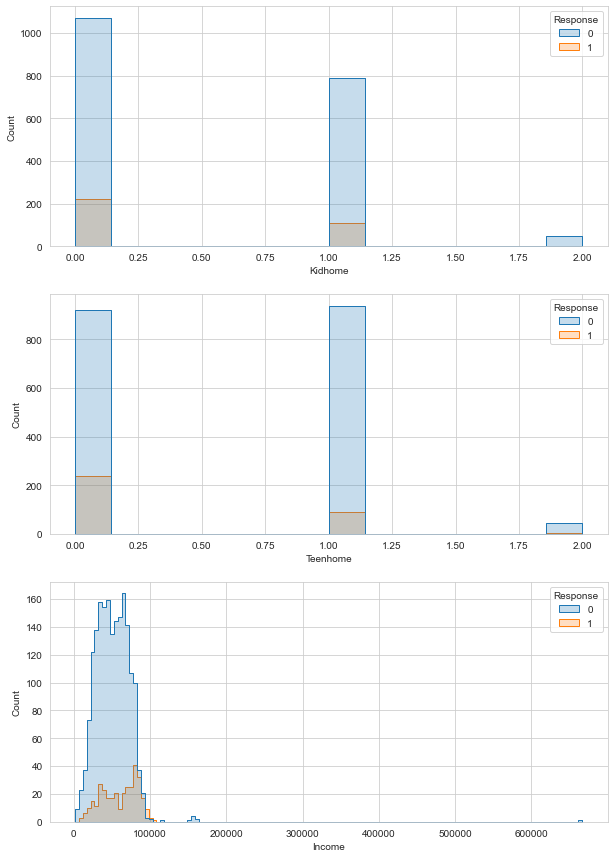

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(ax=axes[0], x='Kidhome', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='Teenhome', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='Income', hue=target[0], element="step", data=df)

---

#### Análise univariada condicionada ao target - Relações com a plataforma:

<AxesSubplot:xlabel='Recency', ylabel='Count'>

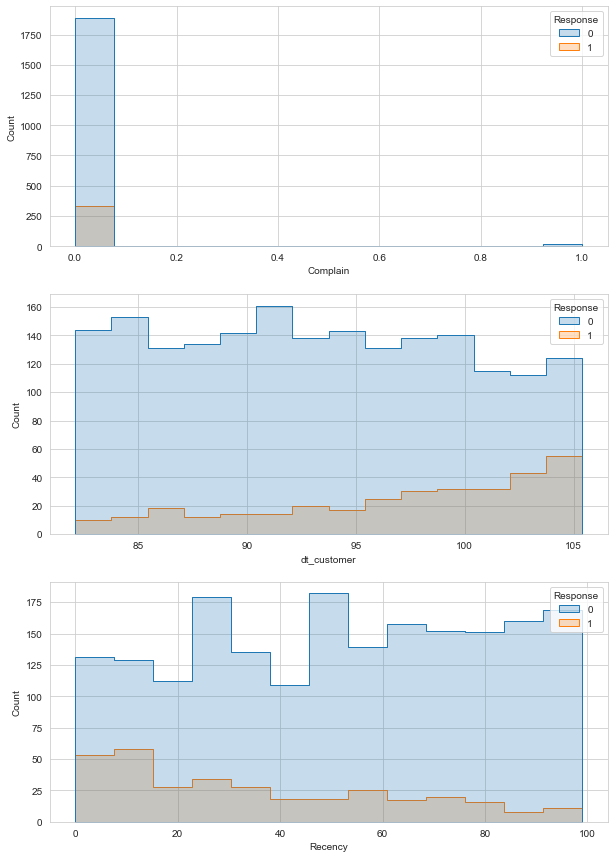

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

#Tem 21 usuários que reclaram nos últimos 2 anos, pode ser algo relevante ou outlier
sns.histplot(ax=axes[0], x='Complain', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='dt_customer', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='Recency', hue=target[0], element="step", data=df)

<AxesSubplot:xlabel='MntFruits', ylabel='Count'>

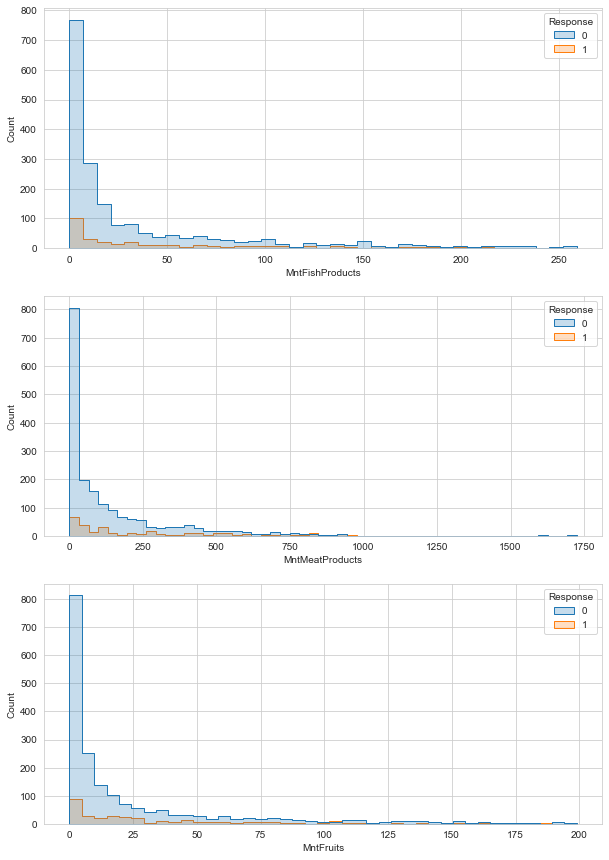

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='MntFishProducts', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='MntMeatProducts', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='MntFruits', hue=target[0], element="step", data=df)

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

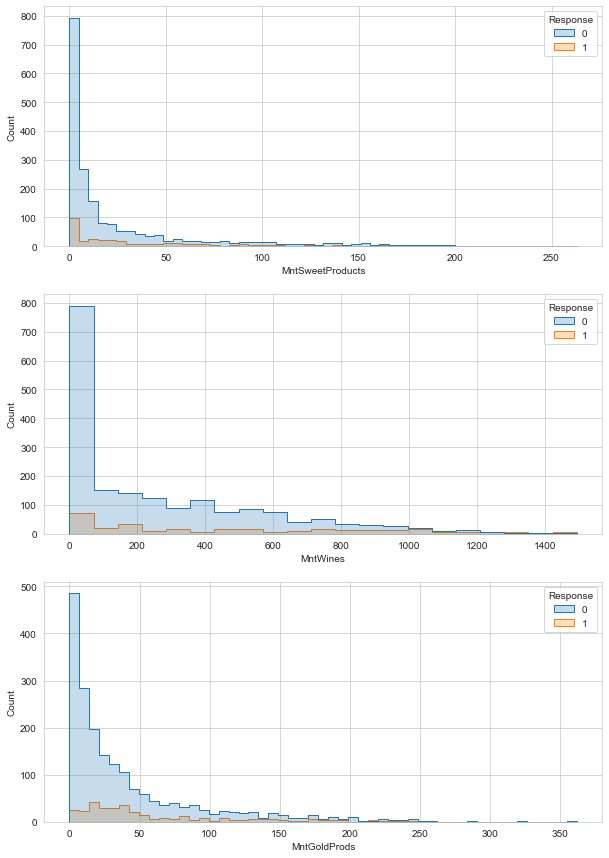

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='MntSweetProducts', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='MntWines', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='MntGoldProds', hue=target[0], element="step", data=df)

<AxesSubplot:xlabel='NumStorePurchases', ylabel='Count'>

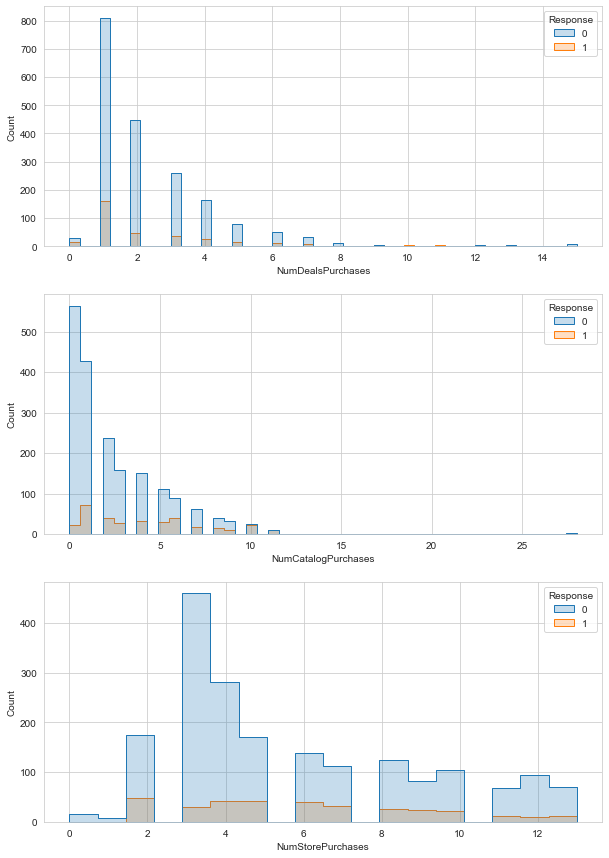

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='NumDealsPurchases',  hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='NumCatalogPurchases',  hue=target[0], element="step", data=df)

sns.histplot(ax=axes[2], x='NumStorePurchases',  hue=target[0], element="step", data=df)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

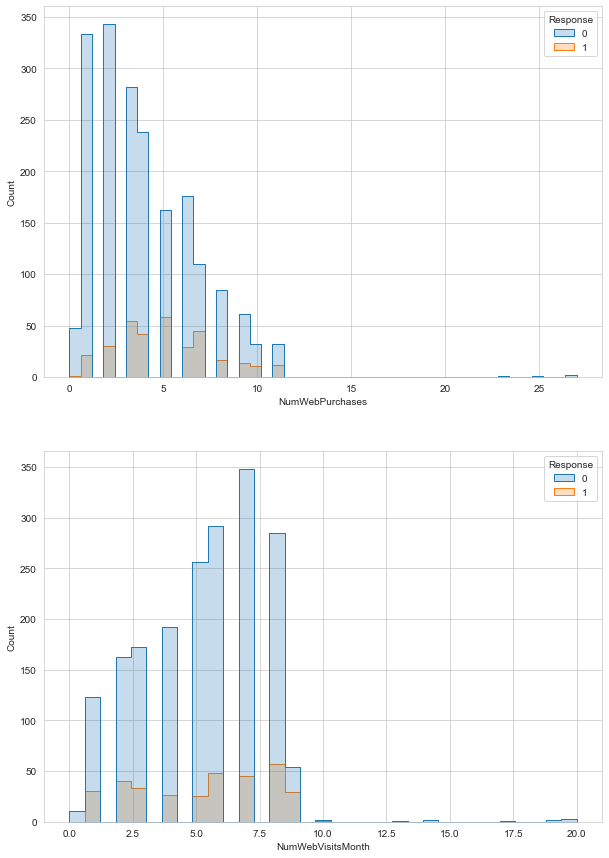

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Tem possível ponto de outlier, haja visto que tem pouquíssimos usuários com mais de 11 compras
sns.histplot(ax=axes[0], x='NumWebPurchases', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='NumWebVisitsMonth', hue=target[0], element="step", data=df)

---

#### Análise univariada condicionada ao target - Relações com as campanhas:

<AxesSubplot:xlabel='AcceptedCmp3', ylabel='Count'>

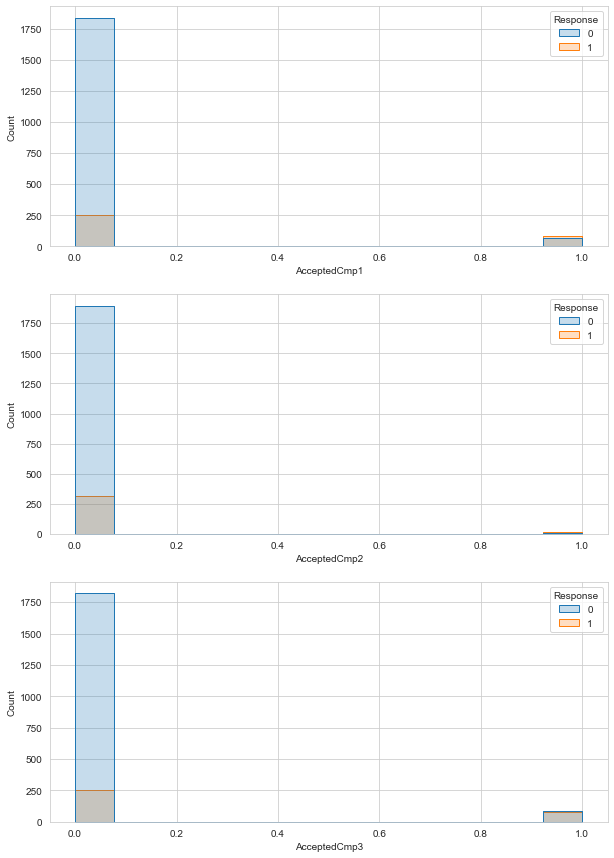

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(ax=axes[0],x="AcceptedCmp1", hue=target[0], element="step", data=df)
sns.histplot(ax=axes[1],x="AcceptedCmp2", hue=target[0], element="step", data=df)
sns.histplot(ax=axes[2],x="AcceptedCmp3", hue=target[0], element="step", data=df)


<AxesSubplot:xlabel='AcceptedCmp5', ylabel='Count'>

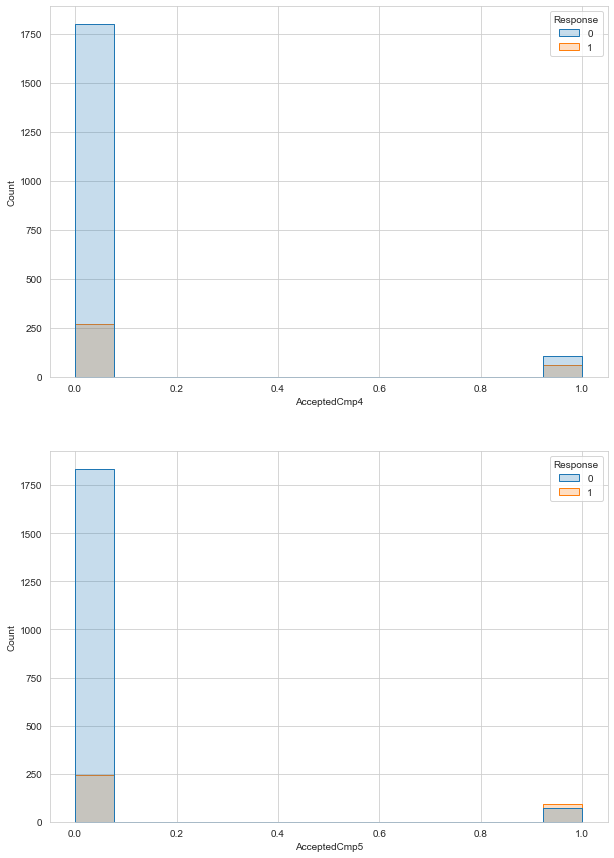

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))


sns.histplot(ax=axes[0], x='AcceptedCmp4', hue=target[0], element="step", data=df)

sns.histplot(ax=axes[1], x='AcceptedCmp5', hue=target[0], element="step", data=df)

-----------------------------

### Comentários da análise exploratória dos dados:<br><br>

* Na análise univariada, foi possível visualizar a presença de possíveis outliers em alguns atrivutos. Na etapa de pré-processamento poderemos ver se são outliers. Se forem, poderemos tratar.<br><br>
* Na análise univariada condicionada ao target, não conseguimos muito sucesso, pois o intuito dessa análise é ver se conseguimos encontrar algum tipo de preditor que consiga separar bem o nosso alvo.<br><br>
* As variáveis Z_Revenue e Z_CostContact são numeros discretos e constantes. Assim, não contribuem em nada nas nossas previsões e insights

---

### <p id='tratamento'>Preparação dos Dados</p>

Nessa sessão, vamos preparar os nossos dados para poder construição o melhor modelo possível. Etapas que vamos executar:
* <a href='#duplicados'>Verificar se há registros duplicadas</a><br><br>
* <a href='#ausentes'>Tratar valores ausentes e Tratar outliers. Vou utilizar os gráficos de boxsplot e scatterplot, a fim de me auxiliar na identificação desses pontos anormais. (Não deixarei o plot de todos os atributos, a fim de não deixar o notebook muito poluído)</a><br><br>
* <a href='#feature'>Feature engineering<a><br><br>

---

#### <p id = 'duplicados'>Verificar se há registros duplicados</p>

In [28]:
#Colunas que são desnecessárias
drop_columns = ['ID', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status', 'Dt_Customer']
df2 = df.drop(columns=drop_columns).copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Birth            2240 non-null   int64  
 1   Income                2216 non-null   float64
 2   Kidhome               2240 non-null   int64  
 3   Teenhome              2240 non-null   int64  
 4   Recency               2240 non-null   int64  
 5   MntWines              2240 non-null   int64  
 6   MntFruits             2240 non-null   int64  
 7   MntMeatProducts       2240 non-null   int64  
 8   MntFishProducts       2240 non-null   int64  
 9   MntSweetProducts      2240 non-null   int64  
 10  MntGoldProds          2240 non-null   int64  
 11  NumDealsPurchases     2240 non-null   int64  
 12  NumWebPurchases       2240 non-null   int64  
 13  NumCatalogPurchases   2240 non-null   int64  
 14  NumStorePurchases     2240 non-null   int64  
 15  NumWebVisitsMonth    

In [29]:
#Verificar se há registros duplicados
df[df.duplicated(['ID'], keep = False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_customer,Education_Coded,Marital_Status_Coded


---

#### <p id = 'ausentes'>Tratar valores ausentes e outlieres</p>

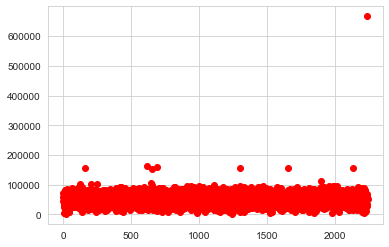

In [30]:
plt.scatter(x=df2.index, y=df2['Income'],color='r')

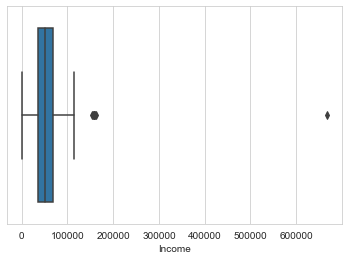

In [31]:
ax = sns.boxplot(x=df2['Income'])

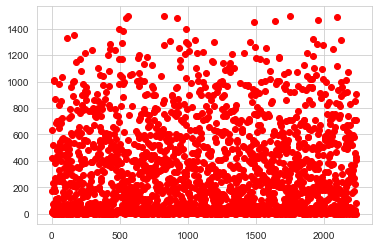

In [32]:
plt.scatter(x=df2.index, y=df2['MntWines'],color='r')

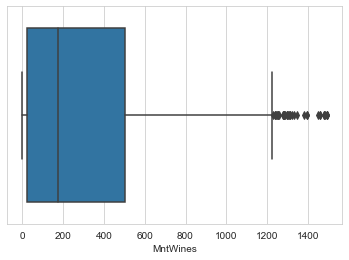

In [33]:
ax = sns.boxplot(x=df2['MntWines'])

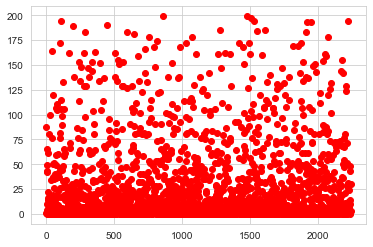

In [34]:
plt.scatter(x=df2.index, y=df2['MntFruits'],color='r')

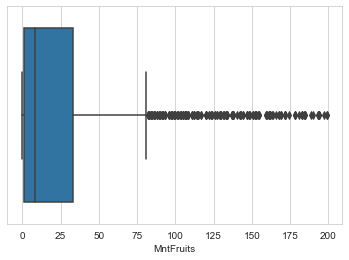

In [35]:
ax = sns.boxplot(x=df2['MntFruits'])

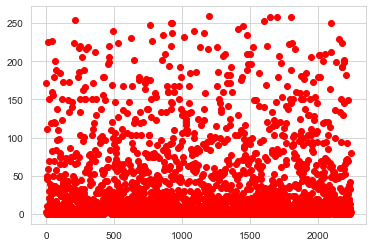

In [36]:
plt.scatter(x=df2.index, y=df2['MntFishProducts'],color='r')

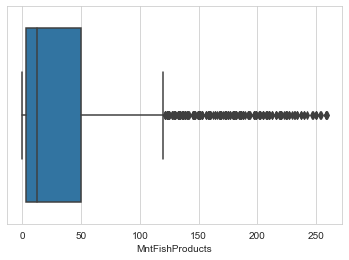

In [37]:
ax = sns.boxplot(x=df2['MntFishProducts'])

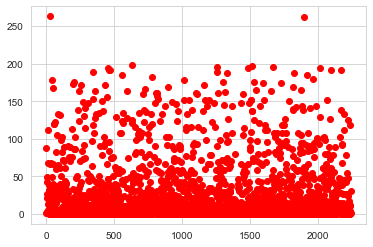

In [38]:
plt.scatter(x=df2.index, y=df2['MntSweetProducts'],color='r')

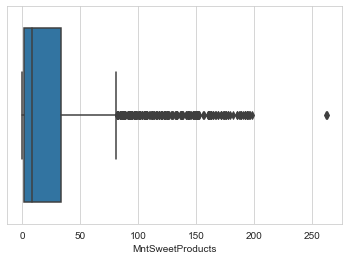

In [39]:
ax = sns.boxplot(x=df2['MntSweetProducts'])

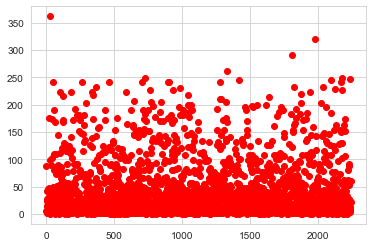

In [40]:
plt.scatter(x=df2.index, y=df2['MntGoldProds'],color='r')

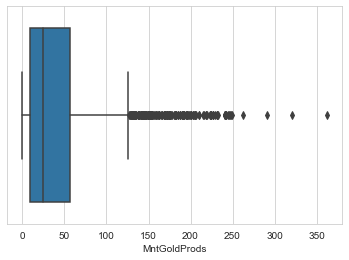

In [41]:
ax = sns.boxplot(x=df2['MntGoldProds'])

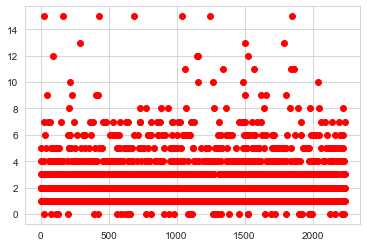

In [42]:
plt.scatter(x=df2.index, y=df2['NumDealsPurchases'],color='r')

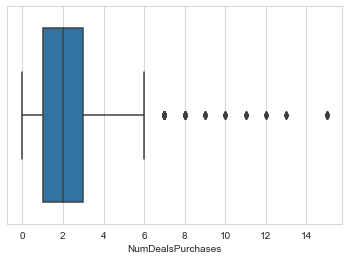

In [43]:
ax = sns.boxplot(x=df2['NumDealsPurchases'])

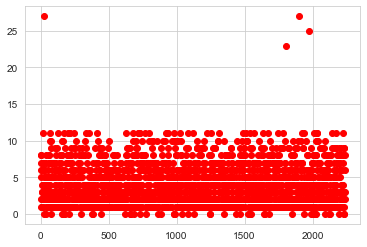

In [44]:
plt.scatter(x=df2.index, y=df2['NumWebPurchases'],color='r')

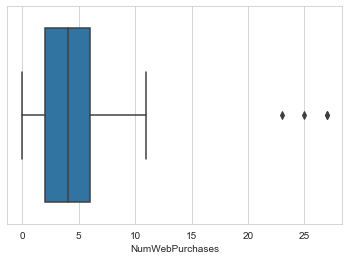

In [45]:
ax = sns.boxplot(x=df2['NumWebPurchases'])

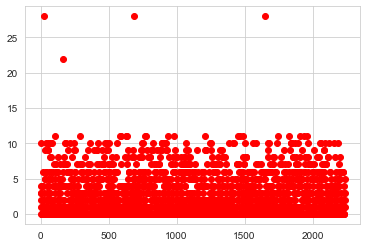

In [46]:
plt.scatter(x=df2.index, y=df2['NumCatalogPurchases'],color='r')

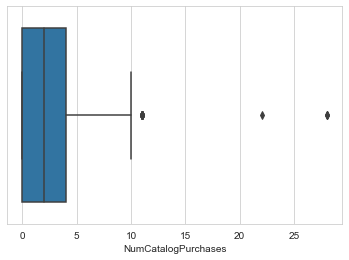

In [47]:
ax = sns.boxplot(x=df2['NumCatalogPurchases'])

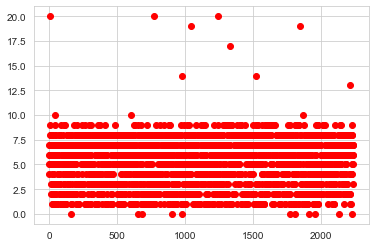

In [48]:
plt.scatter(x=df2.index, y=df2['NumWebVisitsMonth'],color='r')

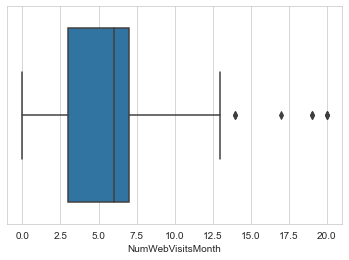

In [49]:
ax = sns.boxplot(x=df2['NumWebVisitsMonth'])

In [50]:
mediana_idade = sts.median(df2['Year_Birth'])
df2.loc[(df2['Year_Birth']<0) | (df2['Year_Birth']>100), ['Year_Birth']] = mediana_idade

In [51]:
desvio_income = np.std(df2['Income'])
mediana_income = sts.median(df2['Income'])
df2['Income'].fillna(mediana_income, inplace = True)
df2.loc[(df2['Income']>np.mean(df2['Income'])+3*desvio_income) | (df2['Income']<np.mean(df2['Income'])-3*desvio_income), ['Income']] = mediana_income

In [52]:
desvio_numweb = np.std(df2['NumWebPurchases'])
mediana_numweb = sts.median(df2['NumWebPurchases'])
df2.loc[(df2['NumWebPurchases']>np.mean(df2['NumWebPurchases'])+3*desvio_numweb) | (df2['NumWebPurchases']<np.mean(df2['NumWebPurchases'])-3*desvio_numweb), ['NumWebPurchases']] = mediana_numweb

In [53]:
desvio_numcatalog = np.std(df2['NumCatalogPurchases'])
mediana_numcatalog = sts.median(df2['NumCatalogPurchases'])
df2.loc[(df2['NumCatalogPurchases']>np.mean(df2['NumCatalogPurchases'])+3*desvio_numcatalog) | (df2['NumCatalogPurchases']<np.mean(df2['NumCatalogPurchases'])-3*desvio_numcatalog), ['NumCatalogPurchases'] ]= mediana_numcatalog

----

#### <p id='feature'>Feature Engineering</p>

In [54]:
df2.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dt_customer,Education_Coded,Marital_Status_Coded
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52.096875,51208.400446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,93.886076,3.393750,2.478571
std,11.694144,20866.113010,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,6.737386,1.124797,1.047972
min,25.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.100000,1.000000,1.000000
25%,44.000000,34572.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.122500,3.000000,2.000000
50%,51.000000,50827.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.950000,3.000000,3.000000
75%,62.000000,68098.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.730000,4.000000,3.000000
max,81.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.400000,5.000000,5.000000


In [55]:
display(df2.loc[(df2['Response'] == 1) & (df2.AcceptedCmp5 == 1)])

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dt_customer,Education_Coded,Marital_Status_Coded
15,75,82800.0,0,0,23,1006,22,115,59,68,...,0,0,1,1,0,0,1,101.50,5,1
55,66,82384.0,0,0,55,984,51,432,180,120,...,0,0,1,0,0,0,1,101.67,4,2
60,39,75777.0,0,0,12,712,26,538,69,13,...,0,1,1,0,0,0,1,94.10,4,1
113,30,86037.0,0,0,95,490,44,125,29,20,...,0,1,1,0,0,0,1,100.20,3,1
124,38,101970.0,0,0,69,722,27,102,44,72,...,0,1,1,1,0,0,1,97.90,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,64,78499.0,0,0,12,912,72,170,47,36,...,0,0,1,0,0,0,1,89.37,3,1
2167,31,91172.0,0,0,94,162,28,818,0,28,...,1,0,1,1,1,0,1,97.40,4,1
2171,51,65706.0,0,0,77,918,10,129,13,0,...,0,1,1,0,1,0,1,94.30,1,4
2175,46,79174.0,0,0,2,1074,37,518,193,92,...,0,0,1,1,0,0,1,99.90,5,3


In [56]:
#Criar uma coluna de aceitação das campanhas anteriores
df2['taxa_acceptdcmp'] = (df2['AcceptedCmp1']+df2['AcceptedCmp2']+df2['AcceptedCmp3']+df2['AcceptedCmp4']+df2['AcceptedCmp5'])/5

In [57]:
"""
Usuários que aceitaram nenhuma campanha anterior. Número de usuários
que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']==0.0].Response.value_counts()

0    1631
1     146
Name: Response, dtype: int64

In [58]:
"""
Usuários que aceitaram pelo menos uma campanha anterior. Número de 
usuários que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']==0.2].Response.value_counts()

0    224
1    101
Name: Response, dtype: int64

In [59]:
"""
Usuários que aceitaram pelo menos duas campanhas anteriores. Número de 
usuários que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']==0.4].Response.value_counts()

1    42
0    41
Name: Response, dtype: int64

In [60]:
"""
Usuários que aceitaram pelo menos três campanhas anteriores. Número de 
usuários que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']==0.6].Response.value_counts()

1    35
0     9
Name: Response, dtype: int64

In [61]:
"""
Usuários que aceitaram pelo menos quatro campanhas anteriores. Número de 
usuários que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']==0.8].Response.value_counts()

1    10
0     1
Name: Response, dtype: int64

In [62]:
"""
Usuários que aceitaram pelo menos cinco campanhas anteriores. Número de 
usuários que comprariam ou não o novo gadget.
"""
df2.loc[df2['taxa_acceptdcmp']>0.8].Response.value_counts()

Series([], Name: Response, dtype: int64)

Uma coisa interessante e que é possívle notar. Quanto maior a taxa de aceitação de campanhas anteriores, maior a probabilidade do usuário comprar o gadget. Além disso, outro fato é que se um usuário nunca participou de alguma campanha, ele não comprou o gadget!

In [63]:
df2.loc[(df2['AcceptedCmp5'] == 1)].Response.value_counts()

1    92
0    71
Name: Response, dtype: int64

In [64]:
df2.loc[(df2['AcceptedCmp4'] == 1)].Response.value_counts()

0    105
1     62
Name: Response, dtype: int64

In [65]:
df2.loc[(df2['AcceptedCmp3'] == 1)].Response.value_counts()

0    86
1    77
Name: Response, dtype: int64

In [67]:
df2.loc[(df2['AcceptedCmp2'] == 1)].Response.value_counts()

1    20
0    10
Name: Response, dtype: int64

In [68]:
df2.loc[(df2['AcceptedCmp1'] == 1)].Response.value_counts()

1    79
0    65
Name: Response, dtype: int64

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Birth            2240 non-null   int64  
 1   Income                2240 non-null   float64
 2   Kidhome               2240 non-null   int64  
 3   Teenhome              2240 non-null   int64  
 4   Recency               2240 non-null   int64  
 5   MntWines              2240 non-null   int64  
 6   MntFruits             2240 non-null   int64  
 7   MntMeatProducts       2240 non-null   int64  
 8   MntFishProducts       2240 non-null   int64  
 9   MntSweetProducts      2240 non-null   int64  
 10  MntGoldProds          2240 non-null   int64  
 11  NumDealsPurchases     2240 non-null   int64  
 12  NumWebPurchases       2240 non-null   int64  
 13  NumCatalogPurchases   2240 non-null   int64  
 14  NumStorePurchases     2240 non-null   int64  
 15  NumWebVisitsMonth    

In [71]:
df2['Total_Gasto'] = df['MntFruits']+ df['MntMeatProducts']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [72]:
'''
Usuários que compraram o gadget tem uma média de gasto bem maior comparando
com quem não compra. Além disso, quem comprou o produto da nova campanha
tem uma média de número de dias desde a última compra menor.
'''
df2.groupby('Response').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,dt_customer,Education_Coded,Marital_Status_Coded,taxa_acceptdcmp,Total_Gasto
Response,,,,,,,,,,,,,,,,,,,,,
0,52.186779,49651.168940,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,...,0.055089,0.037251,0.034103,0.005247,0.009444,93.337718,3.350997,2.487933,0.035362,414.449108
1,51.583832,60094.877246,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,...,0.185629,0.275449,0.236527,0.059880,0.008982,97.015329,3.637725,2.425150,0.197605,779.041916


In [73]:
df2.loc[((df2['Kidhome']>=1)|(df2['Teenhome']>=1))].Response.value_counts()

0    1437
1     165
Name: Response, dtype: int64

In [74]:
df2

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dt_customer,Education_Coded,Marital_Status_Coded,taxa_acceptdcmp,Total_Gasto
0,64,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,104.20,3,1,0.0,1528
1,67,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,85.87,3,1,0.0,22
2,56,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,92.50,3,2,0.0,477
3,37,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,86.73,3,2,0.0,62
4,40,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,87.47,5,3,0.0,367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,94.80,3,3,0.0,814
2236,75,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,82.73,5,2,0.2,68
2237,40,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,0,87.27,3,4,0.2,550
2238,65,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,0,87.30,4,2,0.0,629


---

##### Comentários sobre a preparação dos dados:
Nessa etapa, fizemos passos importantes para ter sucesso na construção do nosso modelo. Primeiro verificamos se tinhamos valores duplicados em nosso dataset, coisa que pode prejudicar nossas previsões. Além disso, tratamos valores ausentes e outliers. Por fim, construimos novas features para o nosso dataset, features essas que deram alguns insights de quem aderiu essa sexta campanha.

----

### <p id='construcao'>Construção do Modelo</p>
Nessa etapa, estamos se aproximando do final, haja visto que fizemos uma boa preparação e exploração dos nossos dados. Agora, vamos fazer alguns passos para ter o melhor modelo que prevê os usuários que comprarão o objeto da sexta campanha.
* <a href='#selecao_f'>Seleção de Feature</a><br><br>
* <a href='#bn'>Normalizar nossos dados</a><br><br>
* <a href='#bn'>Balancear nosso target</a><br><br>
* <a href='#cv'>Treinar o modelo<a><br><br>
* <a href='#cv'>Validação do modelo<a>

---

#### <p id='selecao_f'>Seleção de Feature:</p>
Nessa etapa, vamos ver as melhores variáveis para usarmos na construção do nosso modelo, a fim de eliminar redundâncias, por exemplo.

In [75]:
df3 = df2.copy()
x, y = df3.drop(columns=['Response']).copy(), df3['Response'].copy()

Para me auxiliar na seleção das minhas features eu vou usar o pacote Boruta. O Boruta usa um método de seleção de atributos relevantes. Ele mistura dos valores dos preditores e junte-os aos preditores originais e, em seguida, construa uma RandomForest no conjunto de dados mesclado. Em seguida, faz a comparação das variáveis  originais com as variáveis aleatórias a fim de medir a importância das variáveis. Apenas as variáveis com maior importância do que as variáveis aleatórias são consideradas importantes.

In [76]:
X_train = x.values
y_train = y.values
rf = RandomForestClassifier(n_jobs=-1, max_depth=5, class_weight='balanced')
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	8
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=120, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x27A4F0C3C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x27A4F0C3C40, verbose=2)

In [77]:
colunas_usadas=df3.drop(columns='Response').columns[feat_selector.support_]
colunas_usadas

Index(['Income', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'dt_customer',
       'taxa_acceptdcmp', 'Total_Gasto'],
      dtype='object')

In [78]:
colunas_usadas=df3.drop(columns='Response').columns[feat_selector.support_]
df4 = df3[colunas_usadas]
x, y = df4.copy(), df3['Response'].copy()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=66)

---

#### <p id='bn'>Balanceamento das classes e Normalização dos Dados:</p>
Para ter uma simulação maior do ambiente real, qualquer transformação em nossos dados, vamos fazer depois que separar em treino e teste, a fim de garantir que os dados de treino não interfiram em nosso teste.

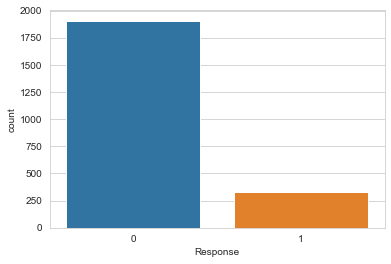

In [80]:
#Plot para mostrar como tá o balanceamento da nossa classe. 
ax = sns.countplot(x="Response", data=df3)

In [81]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Total de elemento do target no treino:")
print(np.asarray((unique_elements, counts_elements)))

Total de elemento do target no treino:
[[   0    1]
 [1335  233]]


In [82]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Total de elemento do target no teste:")
print(np.asarray((unique_elements, counts_elements)))

Total de elemento do target no teste:
[[  0   1]
 [571 101]]


In [83]:
'''
Para balencar nossas classes vamos a técnica de SMOTETomek. Ela é uma 
técnica over sampling. Esse método consiste em balancear os dados 
com SMOTE.
'''
smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [84]:
#Normalização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

#### <p id='cv'>Construção do modelo e Validação do Modelo:</p>
Na construção do modelo, vamos testar 4 algoritmos, a fim de ver quais funcionam melhor nos nossos dados de treinamento e verifificar o desempenho em dados de teste.<br><br>
Na validação do modelo, vamos usar a técnica de cross-validation, haja visto que é o modo mais usado na literatura. Vamos dividir em 10 splits todo o conjunto de dados testes construido anteriormente e testar com cada split e tirar a média de algumas medidas de desempenho, a fim de validar o nosso modelo.

In [146]:
#Algoritmo de Regressão Logística
lr_clf = LogisticRegression(random_state = 0, solver = 'newton-cg', penalty= 'l2')
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [147]:
kfold = StratifiedKFold(n_splits=10)

results = cross_validate(lr_clf, X_train, y_train, cv= kfold, return_train_score=False,
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

print('Validação por cross-validation Regressão Logística:\n\nAcurácia média e desvio padrão: {:.3f} ({:.3f})\n\nRecall médio: {:.3f}\n\nAUROC médio e desvio padrão: {:.3f} ({:.3f})'.format(np.mean(results['test_accuracy']), np.std(results['test_accuracy']),np.mean(results['test_recall']), np.mean(results['test_roc_auc']),np.std(results['test_roc_auc'])))

Validação por cross-validation Regressão Logística:

Acurácia média e desvio padrão: 0.817 (0.028)

Recall médio: 0.801

AUROC médio e desvio padrão: 0.908 (0.024)


In [148]:
y_pred  = lr_clf.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       571
           1       0.48      0.71      0.57       101

    accuracy                           0.84       672
   macro avg       0.71      0.79      0.74       672
weighted avg       0.87      0.84      0.85       672



In [116]:
print('Matriz de Confusão:\n')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Matriz de Confusão:

Predicted    0    1  All
True                    
0          492   79  571
1           29   72  101
All        521  151  672


In [119]:
#DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(random_state = 50)
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [120]:
kfold = StratifiedKFold(n_splits=10)

results = cross_validate(dec_clf, X_train, y_train, cv= kfold, return_train_score=False,
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

print('Validação por cross-validation DecisionTreeClassifier:\n\nAcurácia média e desvio padrão: {:.3f} ({:.3f})\n\nRecall médio: {:.3f}\n\nAUROC médio e desvio padrão: {:.3f} ({:.3f})'.format(np.mean(results['test_accuracy']), np.std(results['test_accuracy']),np.mean(results['test_recall']), np.mean(results['test_roc_auc']),np.std(results['test_roc_auc'])))

Validação por cross-validation DecisionTreeClassifier:

Acurácia média e desvio padrão: 0.882 (0.042)

Recall médio: 0.889

AUROC médio e desvio padrão: 0.886 (0.042)


In [121]:
y_pred  = dec_clf.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       571
           1       0.34      0.43      0.38       101

    accuracy                           0.79       672
   macro avg       0.62      0.64      0.63       672
weighted avg       0.81      0.79      0.80       672



In [122]:
print('Matriz de Confusão:\n')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Matriz de Confusão:

Predicted    0    1  All
True                    
0          488   83  571
1           58   43  101
All        546  126  672


In [123]:
xgb= XGBClassifier(objective='binary:logistic', eval_metric = "logloss", random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [124]:
kfold = StratifiedKFold(n_splits=10)

results = cross_validate(xgb, X_train, y_train, cv= kfold, return_train_score=False,
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

print('Validação por cross-validation xgboost:\n\nAcurácia média e desvio padrão: {:.3f} ({:.3f})\n\nRecall médio: {:.3f}\n\nAUROC médio e desvio padrão: {:.3f} ({:.3f})'.format(np.mean(results['test_accuracy']), np.std(results['test_accuracy']),np.mean(results['test_recall']), np.mean(results['test_roc_auc']),np.std(results['test_roc_auc'])))

Validação por cross-validation xgboost:

Acurácia média e desvio padrão: 0.924 (0.044)

Recall médio: 0.934

AUROC médio e desvio padrão: 0.981 (0.020)


In [125]:
y_pred  = xgb.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       571
           1       0.55      0.50      0.53       101

    accuracy                           0.86       672
   macro avg       0.73      0.72      0.72       672
weighted avg       0.86      0.86      0.86       672



In [126]:
print('Matriz de Confusão:\n')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Matriz de Confusão:

Predicted    0   1  All
True                   
0          529  42  571
1           50  51  101
All        579  93  672


In [127]:
model = GradientBoostingClassifier(random_state = 42, max_depth=2, n_estimators=200, learning_rate=0.1)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=42)

In [128]:
kfold = StratifiedKFold(n_splits=10)

results = cross_validate(model, X_train, y_train, cv= kfold, return_train_score=False,
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

print('Validação por cross-validation GradientBoosting:\n\nAcurácia média e desvio padrão: {:.3f} ({:.3f})\n\nRecall médio: {:.3f}\n\nAUROC médio e desvio padrão: {:.3f} ({:.3f})'.format(np.mean(results['test_accuracy']), np.std(results['test_accuracy']),np.mean(results['test_recall']), np.mean(results['test_roc_auc']),np.std(results['test_roc_auc'])))

Validação por cross-validation GradientBoosting:

Acurácia média e desvio padrão: 0.889 (0.044)

Recall médio: 0.887

AUROC médio e desvio padrão: 0.961 (0.029)


In [129]:
y_pred  = model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       571
           1       0.58      0.63      0.61       101

    accuracy                           0.88       672
   macro avg       0.76      0.78      0.77       672
weighted avg       0.88      0.88      0.88       672



In [111]:
print('Matriz de Confusão:\n')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Matriz de Confusão:

Predicted    0    1  All
True                    
0          525   46  571
1           37   64  101
All        562  110  672


---

#### Comentários sobre a construção do modelo:
Na construção do modelo têm alguns pontos para explorarmos:
* O melhor algoritmo foi a Regressão Logísitca, haja visto que ele se saiu muito bem nas métricas, tem um aproveitamento maior que todos os outros para classificar a classe 1, porque é a classe que mais nos se interessa. <br><br>
* Na construção do modelo temos que prestar atenção não só na acurácia, mas também no recall e na AUROC, pois essas medidas mostram como o modelo tá classificando os possíveis ou não compradores, a sensibilidade para cada classe.

----

### <p id = 'conclusao'>Conclusão:</p>

Tivemos um problema muito interessante, para ter sucesso dividi em problemas menores e tentar ter o melhor desempenho cada um. Uma etapa muito é o entendimento do dados e explora-los, assim, conseguimos observar padrões, anomalias, ruídos, insights etc. No final, conseguimos criar um modelo de machine learning e valida-lo, que consegue classificar muito bem que pode comprar ou não o novo gadget, assim, maximizando os lucros.<br><br>
Algumas carecterísticas dos compradores e Ações que podemos fazer para maximizar as vendas:
* A maioria dos usuários que aderiram a sexta campanha tinha participado de pelo menos uma campanha anterior. Desse modo, se inventir em usuários que participaram de campanhas anteriores, podemos aumentar o lucro;<br><br>
* Pessoas que aderiram a sexta campanha tem um gasto total médio maior que as pessoas que não aderiram. Desse modo, uma ação seria focar em pessoas que gastam mais com os produtos;<br><br>
* Por fim, uma carecterística de quem aderiu 


---